<a href="https://colab.research.google.com/github/ximenaescobar/Actividad-7/blob/main/Actividad_7Regresi%C3%B3nLog%C3%ADstica_a01640607.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Actividad 7 (Regresión Logística)**
##Ximena Escobar Rojas A01640607

In [69]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [4]:
df = pd.read_csv('cuentas_credicel.csv',  encoding='latin-1')
df.head()

<ipython-input-4-079d063ee6cb>:1: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cuentas_credicel.csv',  encoding='latin-1')


,folio,tag,folio_solicitud,fecha,marca,modelo,plazo,precio,enganche,descuento,...,porc_eng,limite_credito,semana_actual,cp_cliente,edad_cliente,cd_cliente,edo_cliente,cd_venta,edo_venta,curp
0,3,HDNAWQ3A,30,12/11/2021 19:00,ZTE,Blade A3 2020 RO B,26S,1949.0,780.0,0.0,...,40.02,5000,26,NaN,23.0,0,0,Tantoyuca,Veracruz,AEVM980413MVZNDR02
1,4,M418YNR4,33,12/11/2021 19:15,MOTOROLA,LTE XT2097-12 E7I POWER Azul,13S,2999.0,1050.0,0.0,...,35.01,6000,13,NaN,60.0,PUEBLA,PUE.,Heroica Puebla de Zaragoza,Puebla,ZALC610119MPLPRR07
2,5,SZ7V3NZT,37,13/11/2021 14:13,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,0.0,...,25.01,0,74,NaN,58.0,TANTOYUCA,VER.,0,0,0
3,6,9I08UIQZ,38,13/11/2021 15:45,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,0.0,...,25.01,7000,13,NaN,42.0,AMXTLAN PUE,NaN,Zacatlan,Puebla,SAMJ790115MPLNRS02
4,7,JMF4LKYU,44,13/11/2021 16:10,MOTOROLA,G10 B,39S,4299.0,1075.0,0.0,...,25.01,7000,74,NaN,33.0,TANTOYUCA,VER.,Tantoyuca,Veracruz,TEHF880707HVZRRR07


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   folio               22735 non-null  int64  
 1   tag                 22735 non-null  object 
 2   folio_solicitud     22735 non-null  int64  
 3   fecha               22735 non-null  object 
 4   marca               22735 non-null  object 
 5   modelo              22735 non-null  object 
 6   plazo               22735 non-null  object 
 7   precio              22735 non-null  float64
 8   enganche            22735 non-null  float64
 9   descuento           22735 non-null  float64
 10  semana              22735 non-null  int64  
 11  monto_financiado    22735 non-null  float64
 12  costo_total         22735 non-null  int64  
 13  monto_accesorios    22735 non-null  float64
 14  agente_venta        22735 non-null  object 
 15  dis_venta           22735 non-null  object 
 16  stat

# Limpieza

In [ ]:
valores_nulos = df.isnull().sum()
columnas_nulos = valores_nulos[valores_nulos > 0]
columnas_nulos

empresa                 13
fecha_ultimo_pago     3356
fecha_pago_proximo    3356
status_cuenta         3314
razones_buro          7340
cp_cliente            7243
edad_cliente             9
edo_cliente              8
dtype: int64

In [6]:
df['limite_credito'] = df['limite_credito'].replace('SD', 0)
df['limite_credito'] = df['limite_credito'].astype(float)

In [7]:
variables = ['empresa', 'fecha_ultimo_pago', 'fecha_pago_proximo', 'status_cuenta', 'razones_buro', 'cp_cliente', 'edo_cliente']
df[variables] = df[variables].bfill()
df[variables] = df[variables].ffill()

In [9]:
df_cn = df.select_dtypes(include=['int', 'float'])
df_cl = df.select_dtypes(include=['object'])

In [10]:
df_cn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   folio             22735 non-null  int64  
 1   folio_solicitud   22735 non-null  int64  
 2   precio            22735 non-null  float64
 3   enganche          22735 non-null  float64
 4   descuento         22735 non-null  float64
 5   semana            22735 non-null  int64  
 6   monto_financiado  22735 non-null  float64
 7   costo_total       22735 non-null  int64  
 8   monto_accesorios  22735 non-null  float64
 9   status            22735 non-null  int64  
 10  fraude            22735 non-null  int64  
 11  inversion         22735 non-null  int64  
 12  pagos_realizados  22735 non-null  int64  
 13  reautorizacion    22735 non-null  int64  
 14  puntos            22735 non-null  int64  
 15  riesgo            22735 non-null  float64
 16  score_buro        22735 non-null  int64 

In [11]:
promedio_edad = df_cn['edad_cliente'].mean()
df_cn['edad_cliente'].fillna(promedio_edad, inplace=True)

In [12]:
valores_nulos = df_cn.isnull().sum()
columnas_nulos = valores_nulos[valores_nulos > 0]
columnas_nulos

Series([], dtype: int64)

<Figure size 1500x800 with 0 Axes>

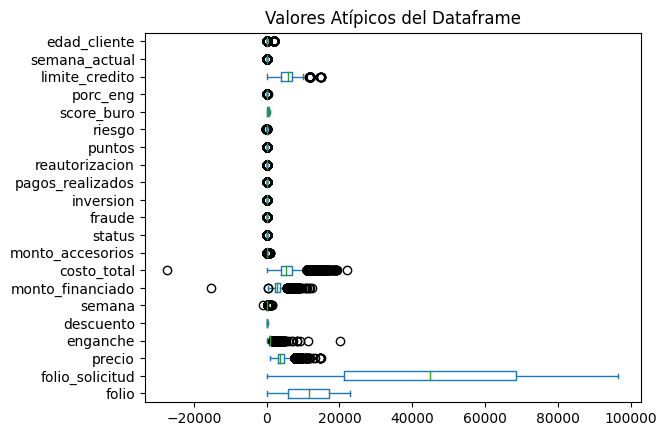

In [13]:
fig = plt.figure(figsize = (15, 8))
df.plot(kind="box", vert = False)
plt.title("Valores Atípicos del Dataframe")
plt.show()

In [14]:
y=df_cn
Limite_Superior= y.mean() + 3* y.std()
Limite_Inferior= y.mean() - 3 * y.std()
print("Limite Superior Permitido", Limite_Superior)
print("Limite Inferior Permitido", Limite_Inferior)

Limite Superior Permitido folio                31323.107698
folio_solicitud     127723.906961
precio                8081.558082
enganche              2356.496845
descuento              478.215020
semana                 541.287392
monto_financiado      6366.317810
costo_total          12857.588246
monto_accesorios       191.260880
status                   2.611178
fraude                   0.864131
inversion                1.511599
pagos_realizados        39.306132
reautorizacion           0.578086
puntos                  48.354233
riesgo                  58.456322
score_buro            1142.021000
porc_eng                45.711306
limite_credito       12331.577603
semana_actual           64.380898
edad_cliente           422.315226
dtype: float64
Limite Inferior Permitido folio               -8301.055796
folio_solicitud    -36023.715538
precio                -87.484900
enganche             -503.622066
descuento            -321.263535
semana                -65.792692
monto_financiado     

In [16]:
df_cn= df_cn[(y<=Limite_Superior)&(y>=Limite_Inferior)]
df_cn.head()

,folio,folio_solicitud,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,status,...,inversion,pagos_realizados,reautorizacion,puntos,riesgo,score_buro,porc_eng,limite_credito,semana_actual,edad_cliente
0,3,30,1949.0,780.0,0.0,81.0,1169.0,2106.0,0.0,2.0,...,0,0.0,0.0,0.0,0.0,0,40.02,5000.0,26.0,23.0
1,4,33,2999.0,1050.0,0.0,225.0,1949.0,2925.0,0.0,2.0,...,0,0.0,0.0,0.0,0.0,0,35.01,6000.0,13.0,60.0
2,5,37,1959.0,490.0,0.0,170.0,1469.0,2210.0,0.0,NaN,...,0,0.0,0.0,0.0,0.0,0,25.01,0.0,NaN,58.0
3,6,38,1959.0,490.0,0.0,170.0,1469.0,2210.0,0.0,2.0,...,0,0.0,0.0,0.0,0.0,0,25.01,7000.0,13.0,42.0
4,7,44,4299.0,1075.0,0.0,178.0,3224.0,6942.0,0.0,1.0,...,0,0.0,0.0,0.0,0.0,0,25.01,7000.0,NaN,33.0


In [17]:
df_cn = df_cn.fillna(round(df_cn.mean(),1))
df_cn

,folio,folio_solicitud,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,status,...,inversion,pagos_realizados,reautorizacion,puntos,riesgo,score_buro,porc_eng,limite_credito,semana_actual,edad_cliente
0,3,30,1949.0,780.0,0.0,81.0,1169.0,2106.0,0.0,2.0,...,0,0.0,0.0,0.0,0.00,0,40.02,5000.0,26.0,23.0
1,4,33,2999.0,1050.0,0.0,225.0,1949.0,2925.0,0.0,2.0,...,0,0.0,0.0,0.0,0.00,0,35.01,6000.0,13.0,60.0
2,5,37,1959.0,490.0,0.0,170.0,1469.0,2210.0,0.0,1.2,...,0,0.0,0.0,0.0,0.00,0,25.01,0.0,20.2,58.0
3,6,38,1959.0,490.0,0.0,170.0,1469.0,2210.0,0.0,2.0,...,0,0.0,0.0,0.0,0.00,0,25.01,7000.0,13.0,42.0
4,7,44,4299.0,1075.0,0.0,178.0,3224.0,6942.0,0.0,1.0,...,0,0.0,0.0,0.0,0.00,0,25.01,7000.0,20.2,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,22967,96502,3349.0,297.0,0.0,211.0,3052.0,5486.0,0.0,1.0,...,0,0.0,0.0,10.0,27.40,469,8.87,10000.0,0.0,22.0
22731,22968,96479,4100.0,1209.0,0.0,200.0,2891.0,5200.0,0.0,1.0,...,0,0.0,0.0,9.0,19.00,502,29.49,5000.0,0.0,27.0
22732,22969,96442,4849.0,1152.0,0.0,256.0,3697.0,6656.0,0.0,1.0,...,0,0.0,0.0,11.0,26.65,459,23.76,4750.0,0.0,36.0
22733,22970,96536,3969.2,897.6,0.0,386.0,3043.8,5588.6,0.0,1.0,...,0,0.0,0.0,14.0,-17.35,699,28.56,7000.0,0.0,53.0


In [18]:
df_cn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   folio             22735 non-null  int64  
 1   folio_solicitud   22735 non-null  int64  
 2   precio            22735 non-null  float64
 3   enganche          22735 non-null  float64
 4   descuento         22735 non-null  float64
 5   semana            22735 non-null  float64
 6   monto_financiado  22735 non-null  float64
 7   costo_total       22735 non-null  float64
 8   monto_accesorios  22735 non-null  float64
 9   status            22735 non-null  float64
 10  fraude            22735 non-null  float64
 11  inversion         22735 non-null  int64  
 12  pagos_realizados  22735 non-null  float64
 13  reautorizacion    22735 non-null  float64
 14  puntos            22735 non-null  float64
 15  riesgo            22735 non-null  float64
 16  score_buro        22735 non-null  int64 

In [19]:
df_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tag                 22735 non-null  object
 1   fecha               22735 non-null  object
 2   marca               22735 non-null  object
 3   modelo              22735 non-null  object
 4   plazo               22735 non-null  object
 5   agente_venta        22735 non-null  object
 6   dis_venta           22735 non-null  object
 7   empresa             22735 non-null  object
 8   fecha_ultimo_pago   22735 non-null  object
 9   fecha_pago_proximo  22735 non-null  object
 10  status_cuenta       22735 non-null  object
 11  razones_buro        22735 non-null  object
 12  cp_cliente          22735 non-null  object
 13  cd_cliente          22735 non-null  object
 14  edo_cliente         22735 non-null  object
 15  cd_venta            22735 non-null  object
 16  edo_venta           22

In [20]:
#Concatenamos los df
df = pd.concat([df_cl, df_cn], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tag                 22735 non-null  object 
 1   fecha               22735 non-null  object 
 2   marca               22735 non-null  object 
 3   modelo              22735 non-null  object 
 4   plazo               22735 non-null  object 
 5   agente_venta        22735 non-null  object 
 6   dis_venta           22735 non-null  object 
 7   empresa             22735 non-null  object 
 8   fecha_ultimo_pago   22735 non-null  object 
 9   fecha_pago_proximo  22735 non-null  object 
 10  status_cuenta       22735 non-null  object 
 11  razones_buro        22735 non-null  object 
 12  cp_cliente          22735 non-null  object 
 13  cd_cliente          22735 non-null  object 
 14  edo_cliente         22735 non-null  object 
 15  cd_venta            22735 non-null  object 
 16  edo_

# Regresión Logística

In [21]:
df.head()

,tag,fecha,marca,modelo,plazo,agente_venta,dis_venta,empresa,fecha_ultimo_pago,fecha_pago_proximo,...,inversion,pagos_realizados,reautorizacion,puntos,riesgo,score_buro,porc_eng,limite_credito,semana_actual,edad_cliente
0,HDNAWQ3A,12/11/2021 19:00,ZTE,Blade A3 2020 RO B,26S,Sintia Verenice Tenorio Perez E,mic0437,microtec,05/03/2022 00:00,12/03/2022 00:00,...,0,0.0,0.0,0.0,0.0,0,40.02,5000.0,26.0,23.0
1,M418YNR4,12/11/2021 19:15,MOTOROLA,LTE XT2097-12 E7I POWER Azul,13S,Alvaro Rafael Pascual,mic015,microtec,05/03/2022 00:00,12/03/2022 00:00,...,0,0.0,0.0,0.0,0.0,0,35.01,6000.0,13.0,60.0
2,SZ7V3NZT,13/11/2021 14:13,ZTE,BLADE A3 2020 Gris,13S,Sintia Verenice Tenorio Perez E,mic0437,microtec,05/03/2022 00:00,12/03/2022 00:00,...,0,0.0,0.0,0.0,0.0,0,25.01,0.0,20.2,58.0
3,9I08UIQZ,13/11/2021 15:45,ZTE,BLADE A3 2020 Gris,13S,Luz Aylin Hernandez Lopez1,mic0748,microtec,05/03/2022 00:00,12/03/2022 00:00,...,0,0.0,0.0,0.0,0.0,0,25.01,7000.0,13.0,42.0
4,JMF4LKYU,13/11/2021 16:10,MOTOROLA,G10 B,39S,Sintia Verenice Tenorio Perez E,mic0437,microtec,05/03/2022 00:00,12/03/2022 00:00,...,0,0.0,0.0,0.0,0.0,0,25.01,7000.0,20.2,33.0


In [22]:
conteo_valores = df['dis_venta'].value_counts()
conteo_valores

mic0912    526
svc001     432
mic014     398
mic015     381
svc003     316
          ... 
mai005       1
stl019       1
yvs036       1
lek016       1
RMC003       1
Name: dis_venta, Length: 585, dtype: int64

In [23]:
df.corr()

<ipython-input-23-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,folio,folio_solicitud,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,status,...,inversion,pagos_realizados,reautorizacion,puntos,riesgo,score_buro,porc_eng,limite_credito,semana_actual,edad_cliente
folio,1.000000,0.971332,0.089539,0.125603,0.134939,0.097617,0.070554,0.048342,0.105582,-0.401955,...,-0.139744,-0.462108,NaN,-0.120519,0.360565,0.548206,0.085404,-0.389241,-0.809617,-0.012752
folio_solicitud,0.971332,1.000000,0.090329,0.122568,0.131475,0.099369,0.072683,0.049955,0.094277,-0.391637,...,-0.130940,-0.453260,NaN,-0.136636,0.348446,0.527624,0.079580,-0.373411,-0.787954,-0.013639
precio,0.089539,0.090329,1.000000,0.690542,0.018582,0.611028,0.935647,0.838116,-0.024338,-0.097610,...,-0.009418,0.021131,NaN,0.072409,-0.042131,0.077478,-0.037848,0.071461,-0.007976,-0.078688
enganche,0.125603,0.122568,0.690542,1.000000,-0.025831,0.379107,0.515344,0.448240,-0.015719,-0.074212,...,-0.106344,-0.088180,NaN,-0.211252,0.300962,0.069650,0.550980,-0.363672,-0.085123,-0.106747
descuento,0.134939,0.131475,0.018582,-0.025831,1.000000,-0.019941,0.033970,0.050457,0.025154,-0.068609,...,0.243043,0.043343,NaN,-0.084649,0.044845,0.106815,-0.058823,-0.099430,-0.123154,-0.019187
semana,0.097617,0.099369,0.611028,0.379107,-0.019941,1.000000,0.602361,0.351682,-0.014543,0.140207,...,0.016371,-0.116870,NaN,0.084549,-0.071684,0.060466,-0.115531,0.097151,-0.174343,-0.027617
monto_financiado,0.070554,0.072683,0.935647,0.515344,0.033970,0.602361,1.000000,0.880544,-0.014844,-0.104128,...,0.031904,0.054574,NaN,0.164210,-0.173172,0.073016,-0.253541,0.215092,0.020533,-0.058117
costo_total,0.048342,0.049955,0.838116,0.448240,0.050457,0.351682,0.880544,1.000000,0.006631,-0.191657,...,0.026717,0.120742,NaN,0.154028,-0.170579,0.077757,-0.256799,0.216293,0.098423,-0.055271
monto_accesorios,0.105582,0.094277,-0.024338,-0.015719,0.025154,-0.014543,-0.014844,0.006631,1.000000,-0.041099,...,-0.022554,-0.055976,NaN,-0.028959,0.059309,0.061045,0.000023,-0.054168,-0.085508,0.003137
status,-0.401955,-0.391637,-0.097610,-0.074212,-0.068609,0.140207,-0.104128,-0.191657,-0.041099,1.000000,...,0.091192,0.296808,NaN,0.072987,-0.163089,-0.229747,-0.012792,0.157092,-0.003240,0.067626


##**Análisis 1**
**Variable dependiente:** inversión

**Variables independientes:** precio, semana, edad_cliente

In [72]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= df[['precio', 'semana', 'edad_cliente']]
Var_Dep= df['inversion']

In [73]:
#Redefinimos las variables
X= Vars_Indep
y= Var_Dep

In [74]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [75]:
#Se escalan todos los datos
escalar = StandardScaler()

In [76]:
#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [77]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [78]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [79]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [80]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[5180    0]
 [1641    0]]


In [81]:
#Evaluación
precision1 = precision_score(y_test, y_pred, average="macro", pos_label="yes")
print(f'Precisión del modelo: {precision1* 100:.2f}%')
exactitud1 = accuracy_score(y_test, y_pred)
print(f'Exactitud del modelo: {exactitud1* 100:.2f}%')
sensibilidad1 = recall_score(y_test, y_pred, average="macro", pos_label="yes")
print(f'Sensibilidad del modelo: {sensibilidad1* 100:.2f}%')
puntajef11 = f1_score(y_test, y_pred, average="macro", pos_label="yes")
print(f'Puntaje F1 del modelo: {puntajef11* 100:.2f}%')

Precisión del modelo: 37.97%
Exactitud del modelo: 75.94%
Sensibilidad del modelo: 50.00%
Puntaje F1 del modelo: 43.16%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'ma

##**Análisis 2**
**Variable dependiente:** plazo

**Variables independientes:** descuento, pagos_realizados, porc_eng

In [41]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= df[['descuento', 'pagos_realizados', 'porc_eng']]
Var_Dep= df['plazo']

In [42]:
#Redefinimos las variables
X= Vars_Indep
y= Var_Dep

In [43]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [44]:
#Se escalan todos los datos
escalar = StandardScaler()

In [45]:
#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [46]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [47]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [48]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test)
y_pred

array(['26S', '26S', '13S', ..., '26S', '26S', '26S'], dtype=object)

In [49]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[ 370 1533    9    0]
 [ 385 2774   31    0]
 [ 158 1412   16    0]
 [  12  119    2    0]]


In [68]:
#Evaluación

precision2 = precision_score(y_test, y_pred, average="macro", pos_label="yes")
print(f'Precisión del modelo: {precision2* 100:.2f}%')
exactitud2 = accuracy_score(y_test, y_pred)
print(f'Exactitud del modelo: {exactitud2* 100:.2f}%')
sensibilidad2 = recall_score(y_test, y_pred, average="macro", pos_label="yes")
print(f'Sensibilidad del modelo: {sensibilidad2* 100:.2f}%')
puntajef12 = f1_score(y_test, y_pred, average="macro", pos_label="yes")
print(f'Puntaje F1 del modelo: {puntajef12* 100:.2f}%')

Precisión del modelo: 8.98%
Exactitud del modelo: 44.51%
Sensibilidad del modelo: 8.30%
Puntaje F1 del modelo: 6.92%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'ma

## **Análisis 3**
**Variable dependiente:** razones_buro

**Variables independientes:** precio, descuento, limite_credito

In [105]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= df[['descuento', 'precio', 'enganche']]
Var_Dep= df['razones_buro']

In [106]:
#Redefinimos las variables
X= Vars_Indep
y= Var_Dep

In [107]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [108]:
#Se escalan todos los datos
escalar = StandardScaler()

In [109]:
#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [110]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [111]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [112]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test)
y_pred

array(['C4', 'C4', 'C4', ..., 'C4', 'C4', 'C4'], dtype=object)

In [113]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [114]:
#Evaluación
precision3 = precision_score(y_test, y_pred, average="macro", pos_label="yes")
print(f'Precisión del modelo: {precision3* 100:.2f}%')
exactitud3 = accuracy_score(y_test, y_pred)
print(f'Exactitud del modelo: {exactitud3* 100:.2f}%')
sensibilidad3 = recall_score(y_test, y_pred, average="macro", pos_label="yes")
print(f'Sensibilidad del modelo: {sensibilidad3* 100:.2f}%')
puntajef13 = f1_score(y_test, y_pred, average="macro", pos_label="yes")
print(f'Puntaje F1 del modelo: {puntajef13* 100:.2f}%')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Precisión del modelo: 0.11%
Exactitud del modelo: 30.96%
Sensibilidad del modelo: 0.20%
Puntaje F1 del modelo: 0.13%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [115]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud3 = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud3)

Exactitud del modelo:
0.3096320187655769


In [116]:
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad3 = recall_score(y_test, y_pred, average="macro", pos_label="yes")
print('Sensibilidad del modelo:')
print(sensibilidad3)

Sensibilidad del modelo:
0.0019746956347645945


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [117]:
# el puntaje F1 que es una combinación entre la precisión y la sensibilidad, para esto importamos f1_score.
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score
puntajef13 = f1_score(y_test, y_pred, average="macro", pos_label="yes")
print('Puntaje F1 del modelo:')
print(puntajef13)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Puntaje F1 del modelo:
0.0012718276963912365


##**Análisis 4**
**Variable dependiente:** marca

**Variables independientes:** descuento, enganche, precio

In [118]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= df[['descuento', 'enganche', 'precio']]
Var_Dep= df['marca']

In [119]:
#Redefinimos las variables
X= Vars_Indep
y= Var_Dep

In [120]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [121]:
#Se escalan todos los datos
escalar = StandardScaler()

In [122]:
#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [123]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [124]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [125]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test)
y_pred

array(['Samsung', 'Samsung', 'Samsung', ..., 'Samsung', 'Samsung',
       'Samsung'], dtype=object)

In [126]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0   29    0    0    0    0    0    0   45]
 [   0    0    0    0    0    0    0    0    0    0    0    1    0    0
     0    9    0    0    0    0    0    0   17]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    1]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0   36    0    0    1    0    0    0   37]
 [   0    0    0    0    0    0    0    0    0    0    0    1    0    0
     3  106    0    0    2    0    0    0   26]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    1]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    2]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    6    0    0    0    0    0    0    2]
 [   0    0    0   

In [127]:
#Evaluación
precision4 = precision_score(y_test, y_pred, average="macro", pos_label="yes")
print(f'Precisión del modelo: {precision4* 100:.2f}%')
exactitud4 = accuracy_score(y_test, y_pred)
print(f'Exactitud del modelo: {exactitud4* 100:.2f}%')
sensibilidad4 = recall_score(y_test, y_pred, average="macro", pos_label="yes")
print(f'Sensibilidad del modelo: {sensibilidad4* 100:.2f}%')
puntajef14 = f1_score(y_test, y_pred, average="macro", pos_label="yes")
print(f'Puntaje F1 del modelo: {puntajef14* 100:.2f}%')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'ma

Precisión del modelo: 9.19%
Exactitud del modelo: 45.01%
Sensibilidad del modelo: 8.30%
Puntaje F1 del modelo: 6.87%


## **Análisis 5**
**Variable dependiente:** empresa

**Variables independientes:** porc_eng, monto_accesorios, precio

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= df[['porc_eng', 'monto_accesorios', 'precio']]
Var_Dep= df['empresa']

In [ ]:
#Redefinimos las variables
X= Vars_Indep
y= Var_Dep

In [ ]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [ ]:
#Se escalan todos los datos
escalar = StandardScaler()

In [ ]:
#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [ ]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [ ]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test)
y_pred

array(['servicel', 'servicel', 'microtec', ..., 'microtec', 'microtec',
       'microtec'], dtype=object)

In [ ]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [231]:
#Evaluación
precision5 = precision_score(y_test, y_pred, average="macro", pos_label="yes")
print(f'Precisión del modelo: {precision5* 100:.2f}%')
exactitud5 = accuracy_score(y_test, y_pred)
print(f'Exactitud del modelo: {exactitud5* 100:.2f}%')
sensibilidad5 = recall_score(y_test, y_pred, average="macro", pos_label="yes")
print(f'Sensibilidad del modelo: {sensibilidad5* 100:.2f}%')
puntajef15 = f1_score(y_test, y_pred, average="macro", pos_label="yes")
print(f'Puntaje F1 del modelo: {puntajef15* 100:.2f}%')

Precisión del modelo: 0.02%
Exactitud del modelo: 9.71%
Sensibilidad del modelo: 0.10%
Puntaje F1 del modelo: 0.02%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'ma

## **Análisis 6**
**Variable dependiente:** edo_cliente

**Variables independientes:** edad_cliente, score_buro, limite_credito

In [128]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= df[['edad_cliente', 'score_buro', 'limite_credito']]
Var_Dep= df['edo_cliente']

In [129]:
#Redefinimos las variables
X= Vars_Indep
y= Var_Dep

In [130]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [131]:
#Se escalan todos los datos
escalar = StandardScaler()

In [132]:
#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [133]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [134]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [135]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test)
y_pred

array([' YUC.', 'PUE', 'PUE', ..., 'YUC', 'PUE', 'PUE'], dtype=object)

In [136]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [185]:
#Evaluación
precision6 = precision_score(y_test, y_pred, average="macro", pos_label="yes")
print(f'Precisión del modelo: {precision6* 100:.2f}%')
exactitud6 = accuracy_score(y_test, y_pred)
print(f'Exactitud del modelo: {exactitud6* 100:.2f}%')
sensibilidad6 = recall_score(y_test, y_pred, average="macro", pos_label="yes")
print(f'Sensibilidad del modelo: {sensibilidad6* 100:.2f}%')
puntajef16 = f1_score(y_test, y_pred, average="macro", pos_label="yes")
print(f'Puntaje F1 del modelo: {puntajef16* 100:.2f}%')

Precisión del modelo: 0.10%
Exactitud del modelo: 2.86%
Sensibilidad del modelo: 0.47%
Puntaje F1 del modelo: 0.11%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'ma

## **Análisis 7**
**Variable dependiente:** modelo

**Variables independientes:** porc_eng, descuento, precio

In [187]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= df[['porc_eng', 'descuento', 'precio']]
Var_Dep= df['modelo']

In [188]:
#Redefinimos las variables
X= Vars_Indep
y= Var_Dep

In [189]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [190]:
#Se escalan todos los datos
escalar = StandardScaler()

In [191]:
#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [192]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [193]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [194]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test)
y_pred

array(['A13', 'A03', 'A32', ..., '4G XT2239-17 E22I  Blanco Kit', 'A03s',
       'A03'], dtype=object)

In [195]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [196]:
#Evaluación
precision7 = precision_score(y_test, y_pred, average="macro", pos_label="yes")
print(f'Precisión del modelo: {precision7* 100:.2f}%')
exactitud7 = accuracy_score(y_test, y_pred)
print(f'Exactitud del modelo: {exactitud7* 100:.2f}%')
sensibilidad7 = recall_score(y_test, y_pred, average="macro", pos_label="yes")
print(f'Sensibilidad del modelo: {sensibilidad7* 100:.2f}%')
puntajef17 = f1_score(y_test, y_pred, average="macro", pos_label="yes")
print(f'Puntaje F1 del modelo: {puntajef17* 100:.2f}%')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'ma

Precisión del modelo: 1.62%
Exactitud del modelo: 24.25%
Sensibilidad del modelo: 2.12%
Puntaje F1 del modelo: 1.48%


## **Análisis 8**
**Variable dependiente:** razones_buro

**Variables independientes:** semana, riesgo, porc_eng

In [197]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= df[['semana', 'riesgo', 'porc_eng']]
Var_Dep= df['razones_buro']

In [198]:
#Redefinimos las variables
X= Vars_Indep
y= Var_Dep

In [199]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [200]:
#Se escalan todos los datos
escalar = StandardScaler()

In [201]:
#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [202]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [203]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [204]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test)
y_pred

array(['K0,D7,J0,E2', 'C4', 'C2', ..., 'C4', 'C4', 'C4'], dtype=object)

In [205]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [206]:
#Evaluación
precision8 = precision_score(y_test, y_pred, average="macro", pos_label="yes")
print(f'Precisión del modelo: {precision8* 100:.2f}%')
exactitud8 = accuracy_score(y_test, y_pred)
print(f'Exactitud del modelo: {exactitud8* 100:.2f}%')
sensibilidad8 = recall_score(y_test, y_pred, average="macro", pos_label="yes")
print(f'Sensibilidad del modelo: {sensibilidad8* 100:.2f}%')
puntajef18 = f1_score(y_test, y_pred, average="macro", pos_label="yes")
print(f'Puntaje F1 del modelo: {puntajef18* 100:.2f}%')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Precisión del modelo: 0.15%
Exactitud del modelo: 36.50%
Sensibilidad del modelo: 0.32%
Puntaje F1 del modelo: 0.19%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


##**Análisis 9**
**Variable dependiente:** dis_venta

**Variables independientes:** monto_financiado, score_buro, precio

In [207]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= df[['monto_financiado', 'semana_actual', 'score_buro']]
Var_Dep= df['dis_venta']

In [208]:
#Redefinimos las variables
X= Vars_Indep
y= Var_Dep

In [209]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [210]:
#Se escalan todos los datos
escalar = StandardScaler()

In [211]:
#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [212]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [213]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [214]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test)
y_pred

array(['svc001', 'mic0912', 'mic0912', ..., 'svc004', 'php005', 'svc001'],
      dtype=object)

In [215]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [232]:
#Evaluación
precision9= precision_score(y_test, y_pred, average="macro", pos_label="yes")
print(f'Precisión del modelo: {precision9* 100:.2f}%')
exactitud9 = accuracy_score(y_test, y_pred)
print(f'Exactitud del modelo: {exactitud9* 100:.2f}%')
sensibilidad9 = recall_score(y_test, y_pred, average="macro", pos_label="yes")
print(f'Sensibilidad del modelo: {sensibilidad9* 100:.2f}%')
puntajef19 = f1_score(y_test, y_pred, average="macro", pos_label="yes")
print(f'Puntaje F1 del modelo: {puntajef19* 100:.2f}%')

Precisión del modelo: 0.02%
Exactitud del modelo: 9.71%
Sensibilidad del modelo: 0.10%
Puntaje F1 del modelo: 0.02%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'ma

## **Análisis 10**
**Variable dependiente:** cd_cliente

**Variables independientes:** monto_financiado, semana_actual, score_buro

In [217]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= df[['monto_financiado', 'precio', 'score_buro']]
Var_Dep= df['cd_cliente']

In [218]:
#Redefinimos las variables
X= Vars_Indep
y= Var_Dep

In [219]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [220]:
#Se escalan todos los datos
escalar = StandardScaler()

In [221]:
#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [222]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [223]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [224]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test)
y_pred

array(['PUEBLA', 'PUEBLA', 'PUEBLA', ..., 'PUEBLA', 'PUEBLA', 'PUEBLA'],
      dtype=object)

In [225]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [229]:
#Evaluación
precision10 = precision_score(y_test, y_pred, average="macro", pos_label="yes")
print(f'Precisión del modelo: {precision10* 100:.2f}%')
exactitud10 = accuracy_score(y_test, y_pred)
print(f'Exactitud del modelo: {exactitud10* 100:.2f}%')
sensibilidad10 = recall_score(y_test, y_pred, average="macro", pos_label="yes")
print(f'Sensibilidad del modelo: {sensibilidad10* 100:.2f}%')
puntajef110 = f1_score(y_test, y_pred, average="macro", pos_label="yes")
print(f'Puntaje F1 del modelo: {puntajef110* 100:.2f}%')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precisión del modelo: 0.02%
Exactitud del modelo: 9.71%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Sensibilidad del modelo: 0.10%
Puntaje F1 del modelo: 0.02%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


## Tabla de Coeficientes

In [234]:
resumen = pd.DataFrame()
variable_dependiente = ['inversión', 'plazo', 'razones_buro', 'marca', 'empresa', 'edo_cliente', 'modelo', 'razones_buro',
                        'dis_venta', 'cd_cliente' ]
precision = [precision1, precision2, precision3, precision4, precision5, precision6, precision7, precision8,
             precision9, precision10]
exactitud = [exactitud1, exactitud2, exactitud3, exactitud4, exactitud5, exactitud6, exactitud7, exactitud8,
             exactitud9, exactitud10]
sensibilidad = [sensibilidad1, sensibilidad2, sensibilidad3, sensibilidad4, sensibilidad5, sensibilidad6, sensibilidad7,
                sensibilidad8, sensibilidad9, sensibilidad10]

resumen['Variable Dependiente'] = variable_dependiente
resumen['Precisión'] = precision
resumen['Exactitud'] = exactitud
resumen['Sensibilidad'] = sensibilidad

resumen

,Variable Dependiente,Precisión,Exactitud,Sensibilidad
0,inversión,0.379710,0.759419,0.500000
1,plazo,0.089819,0.445096,0.082959
2,razones_buro,0.001069,0.309632,0.001975
3,marca,0.000976,0.028588,0.004707
4,empresa,0.000201,0.097053,0.000987
5,edo_cliente,0.000695,0.029028,0.004486
6,modelo,0.016160,0.242486,0.021156
7,razones_buro,0.001519,0.365049,0.003235
8,dis_venta,0.000201,0.097053,0.000987
9,cd_cliente,0.000201,0.097053,0.000987
